# **What Is Hyperparameter Tuning?**

Hyperparameter tuning is the process of tuning the parameters present as the tuples while we build machine learning models. These parameters are defined by us which can be manipulated according to programmer wish. Machine learning algorithms never learn these parameters. These are tuned so that we could get good performance by the model. Hyperparameter tuning aims to find such parameters where the performance of the model is highest or where the model performance is best and the error rate is least. 

For example: 
We define the hyperparameter as shown below for the random forest classifier model. These parameters are tuned randomly and results are checked. 

`RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse', max_depth=None, max_features='auto', max_leaf_nodes=None, max_samples=None, min_impurity_decrease=0.0, min_impurity_split=None, min_samples_leaf=1, min_samples_split=2, min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None, oob_score=False,  random_state=None, verbose=0, warm_start=False)`

## **What Steps To Follow For Hyper Parameter Tuning?**

> * Select the type of model we want to use like RandomForestClassifier, regressor or any other model
> * Check what are the parameters of the model
> * Select the methods for searching the hyperparameter
> * Select the cross-validation approach
> * Evaluate the model using the score

##**Hyperparameter Tuning Methods**

Hyperparameter tuning refers to the shaping of the model architecture from the available space. This, in simple words, is nothing but searching for the right hyperparameter to find high precision and accuracy. There are several parameter tuning techniques, but in this article, we shall look into two of the most widely-used parameter optimiser techniques

> * Grid search
> * Random search


## **Grid Search**

Grid search is a technique which tends to find the right set of hyperparameters for the particular model. Hyperparameters are not the model parameters and it is not possible to find the best set from the training data. Model parameters are learned during training when we optimise a loss function using something like a gradient descent. In this tuning technique, we simply build a model for every combination of various hyperparameters and evaluate each model. The model which gives the highest accuracy wins. The pattern followed here is similar to the grid, where all the values are placed in the form of a matrix. Each set of parameters is taken into consideration and the accuracy is noted. Once all the combinations are evaluated, the model with the set of parameters which give the top accuracy is considered to be the best. Below is a visual description of uniform search pattern of the grid search.

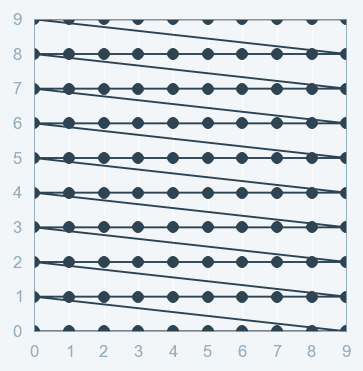

## **Implementation of Regression Model**

First, we will import all the required libraries and the dataset and do the basic EDA to understand the data. Use the below code to do the same

In [ ]:
!python -m pip install pip --upgrade --user -q
!python -m pip install numpy pandas seaborn matplotlib scipy sklearn statsmodels --user -q

In [ ]:
import IPython
IPython.Application.instance().kernel.do_shutdown(True)

In [24]:
import pandas as pd

import numpy as np

from sklearn.ensemble import RandomForestRegressor

In [25]:
from sklearn import datasets
import pandas as pd

boston_data = datasets.load_boston()
df= pd.DataFrame(boston_data.data,columns=boston_data.feature_names)
df['target'] = pd.Series(boston_data.target)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [26]:
print(df.shape)

(506, 14)


In [27]:
print(df.isnull().sum())

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64


In [28]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB
None


There are a total of 506 rows and 14 columns in the data set, all the columns have float64 data type values and there are no missing values in the data set. Now we will define the independent and dependent variables y and x respectively. We will then split the dataset into training and testing. After which the training data will be passed to the decision tree regression model & score on testing would be computed. Refer to the below code for the same. 

In [29]:
y = df['target']

X = df.drop('target', axis=1)

In [30]:

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= .30, random_state=1)

In [39]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()

dtr.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [40]:
print(dtr.score(X_test,y_test))

0.7925755499800959


## **Implementation of Model using GridSearchCV**

First, we will define the library required for grid search followed by defining all the parameters or the combination that we want to test out on the model. We have taken only the four hyperparameters whereas you can define as much as you want. If you increase the number of combinations then time complexity will increase. Use the below code to do the same.

In [41]:
from sklearn.model_selection import GridSearchCV

param_grid = {  'bootstrap': [True], 'max_depth': [5, 10, None], 'max_features': ['auto', 'log2'], 'n_estimators': [5, 6, 7, 8, 9, 10, 11, 12, 13, 15]}

Now we will define the type of model we want to build a random forest regression model in this case and initialize the GridSearchCV over this model for the above-defined parameters. 

In [42]:
rfr = RandomForestRegressor(random_state = 1)

g_search = GridSearchCV(estimator = rfr, param_grid = param_grid, 

                          cv = 3, n_jobs = 1, verbose = 0, return_train_score=True)

We have defined the estimator to be the random forest regression model param_grid to all the parameters we wanted to check and cross-validation to 3. We will now train this model bypassing the training data and checking for the score on testing data. Use the below code to do the same.

In [43]:
g_search.fit(X_train, y_train);

print(g_search.best_params_)

{'bootstrap': True, 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 13}


We can check the best parameter by using the best_params_ function that is shown above. 

In [44]:

rfr = RandomForestRegressor(bootstrap=True, max_depth=5, max_features='auto', n_estimators=13)
rfr.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=13, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [45]:
print(rfr.score(X_test, y_test))

0.8848971745056318


## **Comparison of Models**

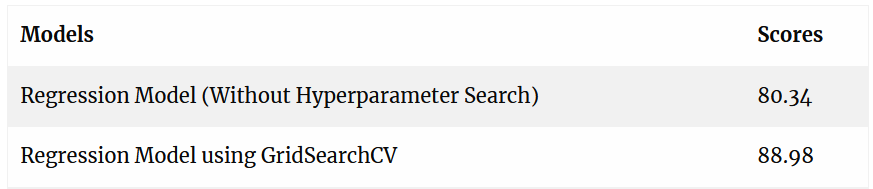

# **Related Articles --**

> * [Grid Search V/S Random Search](https://analyticsindiamag.com/guide-to-hyperparameters-tuning-using-gridsearchcv-and-randomizedsearchcv/) 
> * [Why Random Search is Better ? ](https://analyticsindiamag.com/why-is-random-search-better-than-grid-search-for-machine-learning/)
> * [Food Cost Prediction with Grid Search](https://analyticsindiamag.com/parameter-tuning-with-grid-search-a-hands-on-introduction-with-food-cost-prediction-data-science-hackathon/)